In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.shape


(5001, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [8]:
df['gender'].nunique()

2

In [9]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
counts=df['gender'].value_counts()
counts

Female    2501
Male      2500
Name: gender, dtype: int64

In [11]:
import matplotlib.pyplot as plt

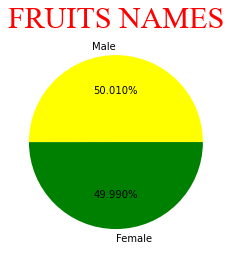

In [12]:
names=['Male', 'Female']
c=['yellow','green']
plt.pie(counts,labels=names,autopct='%1.3f%%',colors=c,radius=1)
plt.title("FRUITS NAMES",fontdict={'name':'Times New Roman','size':30,'color':'red'})
plt.show()

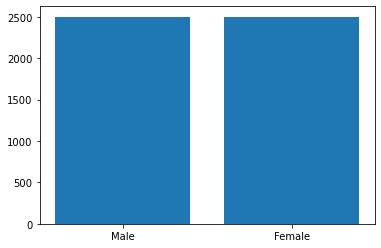

In [13]:
names=['Male', 'Female']
plt.bar(names,counts)
plt.show()

In [14]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [15]:
X=df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
y=df['gender']
print(X.shape)
print(y.shape)

(5001, 7)
(5001,)


In [17]:
#Split into test and train
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4000, 7)
(4000,)
(1001, 7)
(1001,)


In [20]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print("LR",accuracy_score(y_test,y_pred)*100)

LR 96.5034965034965


In [23]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[485  19]
 [ 16 481]]


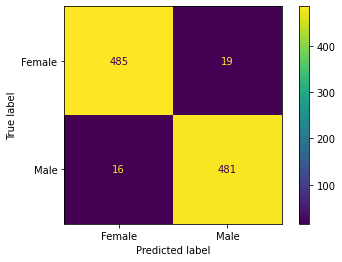

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd=ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
cmd.plot()

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_pred= knn.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.967032967032967


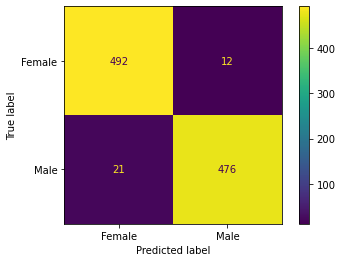

In [26]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=knn.classes_)

cmd.plot()

# NAIVE BAYES

In [27]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.968031968031968


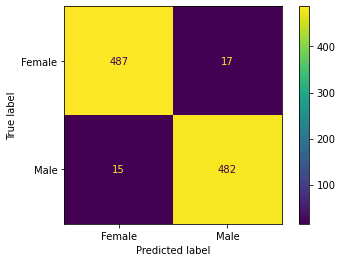

In [28]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=nb.classes_)

cmd.plot()

# SUPPORT VECTOR MACHINE

In [29]:
from sklearn.svm import SVC

sv = SVC(gamma='auto')
sv.fit(X_train,y_train)

y_pred=sv.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.975024975024975


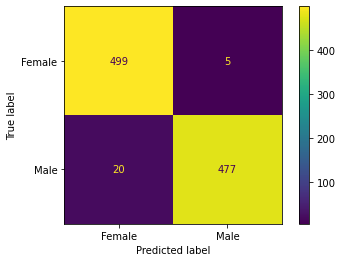

In [30]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=sv.classes_)

cmd.plot()

# Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred=dtree.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.967032967032967


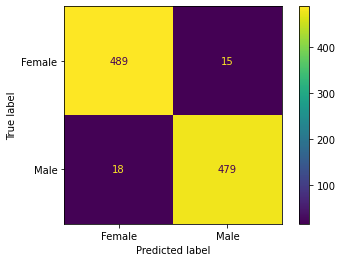

In [32]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=dtree.classes_)

cmd.plot()

# RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.972027972027972


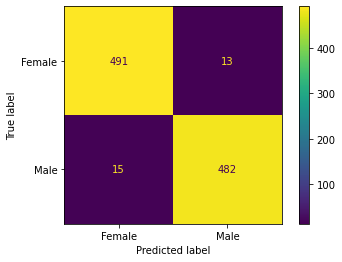

In [34]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)

cmd.plot()

In [36]:
import pickle

pickle.dump(rfc,open('gender_classification_v7.pkl','wb'))

In [37]:
data=[1,11.8,6.1,1,0,1,1]

In [39]:
import warnings
warnings.filterwarnings('ignore')
model=pickle.load(open('gender_classification_v7.pkl','rb'))
import numpy as np
arr=np.array(data).reshape(1,-1)

result=model.predict(arr)
print(result[0])

Male
